## INF-510 Fall 2019 Final Project

1. **The names of team member(s):**

    Hetu Feng, Jiacheng Liu



2.	**How to run your code (what command-line switches they are, what happens when you invoke the code, etc.):**
    
    **This project requires the following packages:**
    
    pandas, numpy, requests, BeautifulSoup and Comment from bs4, csv, and matplotlib
    
    You should be good if you are in the conda base environment, but always make sure above packages are installed.
    
    You can clone the repo at https://github.com/Hetu-Feng/inf510_project
    
    **IMPORTANT**
    
    One of the dataset used in this project called 'ori_position_2.csv' is downloaded directly from the web. Etiher to run the code either in the notebook or to run the .py files from command line, you have to put the 'ori_position_2.csv' file in the same directory for the code to work properly. Otherwise, it will throw an error!
    
    'ori_position_2.csv' is in the /data folder as submission guideline required, but please make sure you put this file to where the notebook and .py file is when you are ready to test
    
    **To Run the notebook**
    
    just simply run the notebook.
    
    **To Run the .py files**
    
    In the command line, switch to the directory where the .py files reside. Type 'python3 main.py -source=remote' in the cmd so the code will grab the data from API and websites, store the raw data to the disk, get dat from the disk do modeling, and print the final visualization result. The whole process should take 1 minute depending on your network connection.

    Once you have done '-source=remote', you can now try type 'python3 main.py -source=local', for which the code won’t run the web scraper, but will grab the raw data that are already stored to the disk in the previous run and do the modeling and output conclusions as well.
    
    **Outputs you should expect**
    
    You will see 6 csv files all with 'ori_' in the namings. These are the raw data that our program scraped from API and online. You will also see abother 4 csv files all with 'position_' in the namings. They are modeled datasets that are ready for visualization. You will finally see a 'Visualization.png' file which is the visualization of this project.

    


3. **Any major “gotchas” to the code (i.e. things that don’t work, go slowly, could be improved, etc.):**

    The web scraping module runs a little slower than we expected as it may take up to 3 minutes or more to finish, depending the network connection. We think it might be that we are grabbing different players data in the past 20 years from several different addresses. Besides the speed, the code runs pretty well.



4. **Anything else you feel is relevant to the grading of your project your project:**

    The data we get from the API isn’t complete enough for us to do the analysis. The API doesn’t contain enough NBA players position information for the last 20 years, so we did extra web scraping work to make sure we have enough player information data to make up the API data.



5. **What did you set out to study:**
    
    We set out to study the change of positional dominance of NBA players in the past 20 years. People are always talking about in recent several years that the ‘Bigs’ are fading and it’s the guards’ league. We want to investigate into this subject and find out if what people saying are true and if it is true, when does it start to happen. We divided player based on the position on court into guards, forwards and center. We look at the change of field goal attempted per game, usage percentage per game, salary and draft expected value based on 3 positions over the year. We wanted to find the trend through the graph we created in the last step.

    MINOR CHANGE TO MILESTONE 1: We originally put guards and forwards in 1 category and centers in another. As the project progressing, we decided to put forwards into its own category to make it more intuitive and reasonable.



6. **What did you Discover/what were your conclusions:**
    
    The original assumption is partially confirmed as the result shows that it is the guards that are dominating the league in recent years and centers faded. However, since 1998, centers were already not as dominant as guards and forwards, and their dominance was dropping during the year 2000 to 2008 period. Centers are making a small comeback after year 2008 and 2009, but they are still down. An interesting finding is that forwards were at the level with guards before around year 2008 but started to go down after that time and on the same dominance level as centers till today. 



7. **What difficulties did you have in completing the project:**

    We were struggling at getting enough player’s position data from the API. When we were testing the API at milestone 1, we thought it was working fine as it returned players name with their position, but when we started to retrieve the 20 years players information, there are a lot of players with empty values in the position column. We had to scrape data from other places to make up the missing values.
    
    Another difficulty is that some player names contain special characters such as “Toni Kukoč”, which is written as “Toni Kukoc” in the salary data source. Therefore, we have a hard time mapping these player names. Solution to the problem is that the player position dataset we downloaded from Basketball-Reference has player names contain special characters which helps to merge with three other datasets: FGA, USG, and draft; while the API data contains “normal” versions of player names that easily map the salary dataset. In this case, after combining the API data set and the downloaded static data set, and creating a new data set, when we merge it with other datasets using Pandas data frames, it automatically maps the version of names that the other data sources share.



8. **What skills did you wish you had while you were doing the project:** 
    
    If I were more familiar with and had known more the methods and functions of the packages, the coding process could’ve been faster. Because I only had the knowledge of basics of the packages, a lot of times I had to google and refer to the documentation to learn how to achieve my goals.



9. **What would you do “next” to expand or augment the project:**

    We can add more relevant metrics to the analysis to further concrete the conclusion. We should devise an appropriate weighting method to put all the metrics together in one graph to get a conclusive trend. We can also extend the years of selection to 50 years and see the change in this long period. Since we’ve had the conclusion in this project, we can further dive into it and see what the reason is that caused this dominance change.


### Access the data

#### This module will scrape data from multiple websites and pass to lists

In [1]:
import requests
from bs4 import BeautifulSoup, Comment


## Build scrapers and API crawlers to create functions 
## Retrieve URLs with parameters pages/years, return the corresponding soup objects 
def url_to_soup_API():
    
    API_url = 'https://www.fantasybasketballnerd.com/service/players'
    API_response = requests.get(API_url)
    position_soup = BeautifulSoup(API_response.content, 'lxml')
    
    return position_soup


def url_to_soup_FGA(year):
    
    FGA_url = f'https://www.basketball-reference.com/leagues/NBA_{year + 1}_per_game.html'
    
    try:
        FGA_response = requests.get(FGA_url)
        FGA_response.raise_for_status()
          
    except requests.exceptions.HTTPError as e:
        print(e)
        return None
    
    FGA_soup = BeautifulSoup(FGA_response.content, 'lxml')
    
    return FGA_soup
    

def url_to_soup_USG(year):
    
    USG_url = f'https://www.basketball-reference.com/leagues/NBA_{year + 1}_advanced.html'

    try:
        USG_response = requests.get(USG_url)
        USG_response.raise_for_status()
          
    except requests.exceptions.HTTPError as e:
        print(e)
        return None
    
    USG_soup = BeautifulSoup(USG_response.content, 'lxml')
    
    return USG_soup
    
    
def url_to_soup_salary(year_start, year_end):
    
    salary_url = f'https://hoopshype.com/salaries/players/{year_start}-{year_end}/'
    
    if type(year_start) == int and type(year_end) == int: 
        if year_start >= 1998 and year_start <= 2018 and year_end >= 1999 and year_end <= 2019 and year_end - year_start == 1:        
            salary_response = requests.get(salary_url)
        else:
            print('Year number out of range!')
            return None 
    else:
        print('Year number accepts integer only!')
        return None 
    
    salary_soup = BeautifulSoup(salary_response.content, 'lxml')
    
    return salary_soup


def url_to_soup_draft(year):
    
    draft_url = f'https://www.basketball-reference.com/draft/NBA_{year}.html'
    
    try:
        draft_response = requests.get(draft_url)
        draft_response.raise_for_status()
          
    except requests.exceptions.HTTPError as e:
        print(e)
        return None
    
    draft_soup = BeautifulSoup(draft_response.content, 'lxml')
    
    return draft_soup


def url_to_soup_EV():
    
    EV_url = 'https://www.basketball-reference.com/draft/preview.html'
    EV_response = requests.get(EV_url)
    EV_soup = BeautifulSoup(EV_response.content, 'lxml')
            
    return EV_soup

    
## Transfer soup objects into data structures
def soup_API_to_list(position_soup):
    
    position_record = []
    name = []
    position = []
    
    main_table = position_soup.find_all('player')
    
    for player in main_table:
        player_name = player.find('name').text
        player_position = player.find('position').text
        
        name.append(player_name)
        position.append(player_position)
       
    for i in range(len(name)):
        position_record.append((name[i], position[i]))
        
    return position_record


def soup_FGA_to_list(FGA_soup):
    
    FGA_record_old = []
    name = []
    FGA = []
    games_played = []
    minutes_played_per_game = []
    
    main_table = FGA_soup.find('table', {'id': 'per_game_stats'})
    
    for player in main_table.find_all('tr')[1:]:
        if len(player.find_all('td')) > 0:
            ## player name
            player_name = player.find_all('td')[0].text.strip('*')
            ## player FGA
            player_FGA = player.find_all('td')[8].text
            ## player total games played
            player_GP = player.find_all('td')[4].text
            ## player minutes played per game 
            player_MP = player.find_all('td')[6].text
            
            name.append(player_name)
            FGA.append(player_FGA)
            games_played.append(player_GP)
            minutes_played_per_game.append(player_MP)
                
    for i in range(len(name)):
        FGA_record_old.append((name[i], FGA[i], games_played[i], minutes_played_per_game[i]))
       
    name_no_repeat = [i for n, i in enumerate(name) if i not in name[:n]]
    FGA_record = []
    
    for item in name_no_repeat:
        index = name.index(item)
        FGA_record.append(FGA_record_old[index])
    
    return FGA_record


def soup_USG_to_list(USG_soup):
    
    USG_record_old = []
    name = []
    USG = []
    games_played = []
    minutes_played = []

    main_table = USG_soup.find('table', {'id': 'advanced_stats'})

    for player in main_table.find_all('tr')[1:]:
        if len(player.find_all('td')) > 0:
            ## player name
            player_name = player.find_all('td')[0].text.strip('*')
            ## player USG%
            player_USG = player.find_all('td')[17].text
            ## player total games played
            player_GP = player.find_all('td')[4].text
            ## player total minutes played 
            player_MP = player.find_all('td')[5].text
            
            name.append(player_name)
            USG.append(player_USG)
            games_played.append(player_GP)
            minutes_played.append(player_MP)
    
    for i in range(len(name)):
        USG_record_old.append((name[i], USG[i], games_played[i], minutes_played[i]))
    
    name_no_repeat = [i for n, i in enumerate(name) if i not in name[:n]]
    USG_record = []
    
    for item in name_no_repeat:
        index = name.index(item)
        USG_record.append(USG_record_old[index])
       
    return USG_record


def soup_salary_to_list(salary_soup):
    
    salary_record = []
    name = []
    salary = []
    
    main_table = salary_soup.find('table', {'class': 'hh-salaries-ranking-table hh-salaries-table-sortable responsive'})

    for player in main_table.find_all('tr')[1:]:
        if len(player.find_all('td')) > 0:
            ## player name
            player_name = player.find_all('td')[1].find('a').text.strip()
            ## player salary
            player_salary = player.find_all('td')[2].get('data-value')
            
            name.append(player_name)
            salary.append(player_salary)
    
    for i in range(len(name)):
        salary_record.append((name[i], salary[i]))
    
    return salary_record
      
    
def soup_draft_to_list(draft_soup):
    
    draft_record = []
    Pk = []
    name = []
    
    
    main_table = draft_soup.find('table', {'id': 'stats'})
    
    for player in main_table.find_all('tr'):
        if (len(player.find_all('td')) > 2):
            ## player pick rank
            player_Pk = player.find_all('td')[0].get('csk')
            ## player name 
            player_name = player.find_all('td')[2].text
                
            Pk.append(player_Pk)
            name.append(player_name)
            
                   
    for i in range(len(Pk)):
        draft_record.append((Pk[i], name[i]))
    
    return draft_record


def soup_EV_to_list(EV_soup):
    
    EV_record = []
    Pk = []
    EV = []
      
    comments = EV_soup.find_all(string = lambda text: isinstance(text, Comment))

    for comment in comments:
        if comment.find("table") > 0:
            EV_soup = BeautifulSoup(comment, 'lxml')
            main_table = EV_soup.find('table', {'id': 'picks'})
            if main_table == None:
                break
            else:
                for player in main_table.find_all('tr')[1:]:
                    if len(player.find_all('td')) > 0:
                        ## player pick rank 
                        player_Pk = player.find_all('td')[0].text
                        ## pick's expected value 
                        pick_EV = player.find_all('td')[2].text
            
                        Pk.append(player_Pk)
                        EV.append(pick_EV)
    
    for i in range(len(Pk)):
        EV_record.append((Pk[i], EV[i]))
    
    return EV_record


## Collect each data set individually 
def position():
    
    position_records = []
    
    
    position_soup = url_to_soup_API()
    position_record = soup_API_to_list(position_soup)    
    position_records = [list(record) for record in position_record]
    #print(len(position_records))
    
    return position_records


def FGA():
    
    FGA_records = []
    
    for year in range(1998, 2019):
        FGA_soup = url_to_soup_FGA(year)
        FGA_record = soup_FGA_to_list(FGA_soup)
        
        for item in FGA_record:
            item += (year,)
            FGA_records.append(item)
    
    FGA_records = [list(FGA_record) for FGA_record in FGA_records]
    #print(len(FGA_records))
      
    return FGA_records


def USG():
    
    USG_records = []
    
    for year in range(1998, 2019):
        USG_soup = url_to_soup_USG(year)
        USG_record = soup_USG_to_list(USG_soup)
        
        for item in USG_record:
            item += (year,)
            USG_records.append(item)
    
    USG_records = [list(USG_record) for USG_record in USG_records]
    #print(len(USG_records))
      
    return USG_records


def salary(): 
    
    salary_records = []
    
    for year in range(1998, 2019):
        salary_soup = url_to_soup_salary(year, year + 1)
        salary_record = soup_salary_to_list(salary_soup)
        
        for item in salary_record:
            item += (year,)
            salary_records.append(item)
    
    salary_records = [list(salary_record) for salary_record in salary_records]
    #print(len(salary_records))
      
    return salary_records


def draft():
    
    draft_records = []
    
    for year in range(1998, 2019):
        draft_soup = url_to_soup_draft(year)
        draft_record = soup_draft_to_list(draft_soup)
        
        for item in draft_record:
            item += (year,)
            draft_records.append(item)
    
    draft_records = [list(draft_record) for draft_record in draft_records]
    #print(len(draft_records))
      
    return draft_records


def EV():
    
    EV_records = []
    
    EV_soup = url_to_soup_EV()
    EV_record = soup_EV_to_list(EV_soup)
    EV_records = [list(record) for record in EV_record]
    #print(len(EV_record))
    
    return EV_records


## Driver function that collect all information from 1998 to 2018
def scrape_all():

    NBA_records = [position(), FGA(), USG(), salary(), draft(), EV()]
    
    return NBA_records



In [9]:
records = scrape_all()

#### Print out all the lists and see if we got the data we want

In [2]:
position()

[['Avery Bradley', 'SG'],
 ['Jaylen Brown', 'SF'],
 ['Jae Crowder', 'PF'],
 ['Gerald Green', 'SF'],
 ['Al Horford', 'C'],
 ['R.J. Hunter', 'SG'],
 ['Demetrius Jackson', 'PG'],
 ['Jonas Jerebko', 'PF'],
 ['Amir Johnson', 'C'],
 ['Jalen Jones', 'PF'],
 ['Damion Lee', 'SF'],
 ['Jordan Mickey', 'C'],
 ['Kelly Olynyk', 'C'],
 ['Terry Rozier', 'SG'],
 ['Marcus Smart', 'SG'],
 ['Isaiah Thomas', 'PG'],
 ['James Young', 'SG'],
 ['Tyler Zeller', 'C'],
 ['Anthony Bennett', 'PF'],
 ['Bojan Bogdanovic', 'PF'],
 ['Trevor Booker', 'PF'],
 ['Randy Foye', 'SG'],
 ['Jorge Gutierrez', 'PG'],
 ['Joe Harris', 'SG'],
 ['Rondae Hollis-Jefferson', 'C'],
 ['Sean Kilpatrick', 'SG'],
 ['Caris LeVert', 'SF'],
 ['Jeremy Lin', 'PG'],
 ['Brook Lopez', 'C'],
 ['Chris McCullough', 'PF'],
 ['Isaiah Whitehead', 'SG'],
 ['Carmelo Anthony', 'PF'],
 ['Ron Baker', 'SG'],
 ['Willy Hernangomez', 'C'],
 ['Justin Holiday', 'SF'],
 ['Brandon Jennings', 'PG'],
 ['Mindaugas Kuzminskas', 'SF'],
 ['Courtney Lee', 'SF'],
 ['Joakim No

In [3]:
FGA()

[['Tariq Abdul-Wahad', '8.3', '49', '24.6', 1998],
 ['Shareef Abdur-Rahim', '17.9', '50', '40.4', 1998],
 ['Cory Alexander', '7.2', '36', '21.6', 1998],
 ['Ray Allen', '13.5', '50', '34.4', 1998],
 ['Peter Aluma', '1.0', '2', '2.5', 1998],
 ['Derek Anderson', '8.3', '38', '25.7', 1998],
 ['Kenny Anderson', '10.5', '34', '29.7', 1998],
 ['Nick Anderson', '13.6', '47', '33.6', 1998],
 ['Shandon Anderson', '7.3', '50', '21.4', 1998],
 ['Chris Anstey', '3.4', '41', '11.5', 1998],
 ['Greg Anthony', '5.0', '50', '16.1', 1998],
 ['B.J. Armstrong', '2.8', '32', '11.2', 1998],
 ['Darrell Armstrong', '10.4', '50', '30.0', 1998],
 ['Keith Askins', '1.9', '33', '12.6', 1998],
 ['Stacey Augmon', '3.6', '48', '18.2', 1998],
 ['Isaac Austin', '9.2', '49', '25.7', 1998],
 ['Anthony Avent', '2.6', '5', '8.8', 1998],
 ['Thurl Bailey', '4.1', '43', '12.6', 1998],
 ['Toby Bailey', '3.2', '27', '9.2', 1998],
 ['LaMark Baker', '1.0', '1', '2.0', 1998],
 ['Vin Baker', '12.9', '34', '34.2', 1998],
 ['Charles 

In [4]:
USG()

[['Tariq Abdul-Wahad', '19.0', '49', '1205', 1998],
 ['Shareef Abdur-Rahim', '28.9', '50', '2021', 1998],
 ['Cory Alexander', '20.3', '36', '778', 1998],
 ['Ray Allen', '24.5', '50', '1719', 1998],
 ['Peter Aluma', '34.1', '2', '5', 1998],
 ['Derek Anderson', '23.4', '38', '978', 1998],
 ['Kenny Anderson', '20.9', '34', '1010', 1998],
 ['Nick Anderson', '22.8', '47', '1581', 1998],
 ['Shandon Anderson', '21.6', '50', '1072', 1998],
 ['Chris Anstey', '18.2', '41', '470', 1998],
 ['Greg Anthony', '19.6', '50', '806', 1998],
 ['B.J. Armstrong', '15.8', '32', '358', 1998],
 ['Darrell Armstrong', '22.9', '50', '1502', 1998],
 ['Keith Askins', '9.4', '33', '415', 1998],
 ['Stacey Augmon', '12.4', '48', '874', 1998],
 ['Isaac Austin', '22.9', '49', '1259', 1998],
 ['Anthony Avent', '22.7', '5', '44', 1998],
 ['Thurl Bailey', '19.1', '43', '543', 1998],
 ['Toby Bailey', '19.0', '27', '249', 1998],
 ['LaMark Baker', '45.4', '1', '2', 1998],
 ['Vin Baker', '22.8', '34', '1162', 1998],
 ['Charles

In [5]:
salary()

[['Patrick Ewing', '18500000', 1998],
 ["Shaquille O'Neal", '15000000', 1998],
 ['David Robinson', '14841000', 1998],
 ['Kevin Garnett', '14000000', 1998],
 ['Alonzo Mourning', '13130000', 1998],
 ['Juwan Howard', '13125000', 1998],
 ['Hakeem Olajuwon', '12943000', 1998],
 ['Derrick Coleman', '12267000', 1998],
 ['Dikembe Mutombo', '11218000', 1998],
 ['Jayson Williams', '11000000', 1998],
 ['Scottie Pippen', '11000000', 1998],
 ['Larry Johnson', '10186000', 1998],
 ['Charles Oakley', '10186000', 1998],
 ['Chris Webber', '10000000', 1998],
 ['Shawn Kemp', '9740000', 1998],
 ['Antonio McDyess', '9000000', 1998],
 ['Arvydas Sabonis', '9000000', 1998],
 ['Damon Stoudamire', '9000000', 1998],
 ['Rasheed Wallace', '9000000', 1998],
 ['Gary Payton', '8715000', 1998],
 ['Anfernee Hardaway', '8505000', 1998],
 ['Rik Smits', '8500000', 1998],
 ['Latrell Sprewell', '8300000', 1998],
 ['Vlade Divac', '8300000', 1998],
 ['Horace Grant', '7843000', 1998],
 ['Tom Gugliotta', '7800000', 1998],
 ['Bry

In [6]:
draft()

[['1', 'Michael Olowokandi', 1998],
 ['2', 'Mike Bibby', 1998],
 ['3', 'Raef LaFrentz', 1998],
 ['4', 'Antawn Jamison', 1998],
 ['5', 'Vince Carter', 1998],
 ['6', 'Robert Traylor', 1998],
 ['7', 'Jason Williams', 1998],
 ['8', 'Larry Hughes', 1998],
 ['9', 'Dirk Nowitzki', 1998],
 ['10', 'Paul Pierce', 1998],
 ['11', 'Bonzi Wells', 1998],
 ['12', 'Michael Doleac', 1998],
 ['13', 'Keon Clark', 1998],
 ['14', 'Michael Dickerson', 1998],
 ['15', 'Matt Harpring', 1998],
 ['16', 'Bryce Drew', 1998],
 ['17', 'Rasho Nesterović', 1998],
 ['18', 'Mirsad Türkcan', 1998],
 ['19', 'Pat Garrity', 1998],
 ['20', 'Roshown McLeod', 1998],
 ['21', 'Ricky Davis', 1998],
 ['22', 'Brian Skinner', 1998],
 ['23', 'Tyronn Lue', 1998],
 ['24', 'Felipe López', 1998],
 ['25', 'Al Harrington', 1998],
 ['26', 'Sam Jacobson', 1998],
 ['27', 'Vladimir Stepania', 1998],
 ['28', 'Corey Benjamin', 1998],
 ['29', 'Nazr Mohammed', 1998],
 ['30', 'Ansu Sesay', 1998],
 ['31', 'Ruben Patterson', 1998],
 ['32', 'Rashard Le

In [7]:
EV()

[['1', '76.9'],
 ['2', '63.9'],
 ['3', '56.2'],
 ['4', '50.8'],
 ['5', '46.6'],
 ['6', '43.2'],
 ['7', '40.3'],
 ['8', '37.8'],
 ['9', '35.6'],
 ['10', '33.6'],
 ['11', '31.8'],
 ['12', '30.2'],
 ['13', '28.7'],
 ['14', '27.3'],
 ['15', '26.0'],
 ['16', '24.8'],
 ['17', '23.6'],
 ['18', '22.6'],
 ['19', '21.5'],
 ['20', '20.6'],
 ['21', '19.7'],
 ['22', '18.8'],
 ['23', '18.0'],
 ['24', '17.2'],
 ['25', '16.4'],
 ['26', '15.6'],
 ['27', '14.9'],
 ['28', '14.3'],
 ['29', '13.6'],
 ['30', '13.0'],
 ['31', '12.3'],
 ['32', '11.7'],
 ['33', '11.2'],
 ['34', '10.6'],
 ['35', '10.1'],
 ['36', '9.5'],
 ['37', '9.0'],
 ['38', '8.5'],
 ['39', '8.0'],
 ['40', '7.5'],
 ['41', '7.1'],
 ['42', '6.6'],
 ['43', '6.2'],
 ['44', '5.8'],
 ['45', '5.3'],
 ['46', '4.9'],
 ['47', '4.5'],
 ['48', '4.1'],
 ['49', '3.7'],
 ['50', '3.4'],
 ['51', '3.0'],
 ['52', '2.6'],
 ['53', '2.3'],
 ['54', '1.9'],
 ['55', '1.6'],
 ['56', '1.2'],
 ['57', '0.9'],
 ['58', '0.6'],
 ['59', '0.2'],
 ['60', '-0.1']]

### Store Data to Disk

#### raw data looks pretty good, so we just have to store them each into a csv file

In [11]:
import csv


## Export list of lists to csv files
## Original data 
with open('ori_position_1.csv', 'w', newline = '') as myfile:
    wr = csv.writer(myfile, quoting = csv.QUOTE_ALL)
    wr.writerow(('player_name', 'position'))
    wr.writerows(records[0])

with open('ori_FGA.csv', 'w', newline = '') as myfile:
    wr = csv.writer(myfile, quoting = csv.QUOTE_ALL)
    wr.writerow(('player_name', 'field_goal_attempt', 'games_played', 'minutes_played_per_game', 'year'))
    wr.writerows(records[1])

with open('ori_USG.csv', 'w', newline = '') as myfile:
    wr = csv.writer(myfile, quoting = csv.QUOTE_ALL)
    wr.writerow(('player_name', 'usage_percentage', 'games_played', 'total_minutes_played', 'year'))
    wr.writerows(records[2])

with open('ori_salary.csv', 'w', newline = '') as myfile:
    wr = csv.writer(myfile, quoting = csv.QUOTE_ALL)
    wr.writerow(('player_name', 'salary', 'year'))
    wr.writerows(records[3])

with open('ori_draft.csv', 'w', newline = '') as myfile:
    wr = csv.writer(myfile, quoting = csv.QUOTE_ALL)
    wr.writerow(('pick_rank', 'player_name', 'year'))
    wr.writerows(records[4])

with open('ori_EV.csv', 'w', newline = '') as myfile:
    wr = csv.writer(myfile, quoting = csv.QUOTE_ALL)
    wr.writerow(('pick_rank', 'expected_value'))
    wr.writerows(records[5])


### Model Data

In [12]:
import pandas as pd


## Convert stored data into DataFrames
ori_position_1_df = pd.read_csv('ori_position_1.csv')
ori_position_2_df = pd.read_csv('ori_position_2.csv')
ori_FGA_df = pd.read_csv('ori_FGA.csv')
ori_USG_df = pd.read_csv('ori_USG.csv')
ori_salary_df = pd.read_csv('ori_salary.csv')
ori_draft_df = pd.read_csv('ori_draft.csv')
ori_EV_df = pd.read_csv('ori_EV.csv')


## Make a copy of the original data frame
position_1_df = ori_position_1_df.copy()
FGA_df = ori_FGA_df.copy()
USG_df = ori_USG_df.copy()
salary_df = ori_salary_df.copy()
draft_df = ori_draft_df.copy()
EV_df = ori_EV_df.copy()


## Data Cleaning
## combine SF and PF as F (forwards), SG and PG as G (guards)
position_1_df = position_1_df.replace(['SF', 'PF'], 'F')
position_1_df = position_1_df.replace(['SG', 'PG'], 'G')

## Clean alternative position csv
position_2_df = ori_position_2_df.copy()
position_2_df = position_2_df[['player_name', 'position']]
position_2_df['player_name'] = position_2_df['player_name'].apply(lambda x: x.split('\\')[0])
position_2_df['player_name'] = position_2_df['player_name'].apply(lambda x: x.strip('*'))
position_2_df = position_2_df.drop_duplicates(subset = 'player_name', keep='first')
position_2_df['position'] = position_2_df['position'].apply(lambda x: x.split('-')[0])
position_2_df = position_2_df.replace(['SF', 'PF'], 'F')
position_2_df = position_2_df.replace(['SG', 'PG'], 'G')

## delete players that have games played less than 30 and minutes played per game less than 15 minutes
FGA_df.games_played = FGA_df.games_played.astype(int)
FGA_df = FGA_df[FGA_df.games_played >= 30]
FGA_df.minutes_played_per_game = FGA_df.minutes_played_per_game.astype(float)
FGA_df = FGA_df[FGA_df.minutes_played_per_game >= 15.0]
#FGA_df.info()
FGA_df = FGA_df.drop('games_played', axis = 1)
FGA_df = FGA_df.drop('minutes_played_per_game', axis = 1)

# ## delete players that have games played less than 30 and total minutes played less than 15 minutes
USG_df.games_played = USG_df.games_played.astype(int)
USG_df = USG_df[USG_df.games_played >= 30]
USG_df.total_minutes_played = USG_df.total_minutes_played.astype(float)
USG_df = USG_df[USG_df.total_minutes_played >= 450.0]
#USG_df.info()
USG_df = USG_df.drop('games_played', axis = 1)
USG_df = USG_df.drop('total_minutes_played', axis = 1)

## Sort FGA DataFrame according to its top 100 values group by years
FGA_df.field_goal_attempt = FGA_df.field_goal_attempt.astype(float)
FGA_df = FGA_df.groupby(['year']).apply(lambda x: x.sort_values(["field_goal_attempt"], ascending = False)).reset_index(drop=True)
#FGA_df = FGA_df.groupby(['year']).head(100)

## Sort USG DataFrame according to its top 100 values group by years 
USG_df.usage_percentage = USG_df.usage_percentage.astype(float)
USG_df = USG_df.groupby(['year']).apply(lambda x: x.sort_values(["usage_percentage"], ascending = False)).reset_index(drop=True)
#USG_df = USG_df.groupby(['year']).head(200)

## Sort salary DataFrame according to its top 100 values group by years
salary_df.salary = salary_df.salary.astype(int)
salary_df = salary_df.groupby(['year']).apply(lambda x: x.sort_values(["salary"], ascending = False)).reset_index(drop=True)
salary_df = salary_df.groupby(['year']).head(100)

## Integrate draft DataFrame and EV DataFrame and sort the new DataFrame according to its top 30 values group by year
new_draft_df = pd.merge(draft_df, EV_df, on = 'pick_rank')
new_draft_df = new_draft_df.drop(['pick_rank'], axis = 1)
new_draft_df = new_draft_df[['player_name', 'expected_value', 'year']]
new_draft_df.expected_value = new_draft_df.expected_value.astype(float)
new_draft_df = new_draft_df.groupby(['year']).apply(lambda x: x.sort_values(["expected_value"], ascending = False)).reset_index(drop=True)
#new_draft_df = new_draft_df.groupby(['year']).head(30)


## Integrate all data into four data frames: position vs FGA, position vs USG, position vs salary, position vs draft
## Integrate position_1_df and position_2_df into position_df
#position_df = position_1_df.join(position_2_df, on = ['player_name', 'position'])
#position_df = position_1_df.join(position_2_df.set_index('position'), on='position')
position_df = position_1_df.append(position_2_df)


## position vs FGA
position_FGA_df = pd.merge(position_df, FGA_df, on = 'player_name')
position_FGA_df = position_FGA_df.drop('player_name', axis = 1)
position_FGA_df = position_FGA_df[['position', 'field_goal_attempt', 'year']]
position_FGA_df = position_FGA_df.groupby(['year']).apply(lambda x: x.sort_values(["field_goal_attempt"], ascending = False)).reset_index(drop=True)

## position vs USG
position_USG_df = pd.merge(position_df, USG_df, on = 'player_name')
position_USG_df = position_USG_df.drop('player_name', axis = 1)
position_USG_df = position_USG_df[['position', 'usage_percentage', 'year']]
position_USG_df = position_USG_df.groupby(['year']).apply(lambda x: x.sort_values(["usage_percentage"], ascending = False)).reset_index(drop=True)

## position vs salary
position_salary_df = pd.merge(position_df, salary_df, on = 'player_name')
position_salary_df = position_salary_df.drop('player_name', axis = 1)
position_salary_df = position_salary_df[['position', 'salary', 'year']]
position_salary_df = position_salary_df.groupby(['year']).apply(lambda x: x.sort_values(["salary"], ascending = False)).reset_index(drop=True)

## position vs draft
position_draft_df = pd.merge(position_df, new_draft_df, on = 'player_name')
position_draft_df = position_draft_df.drop(['player_name'], axis = 1)
position_draft_df = position_draft_df[['position', 'expected_value', 'year']]
position_draft_df = position_draft_df.groupby(['year']).apply(lambda x: x.sort_values(["expected_value"], ascending = False)).reset_index(drop=True)


## Keep grouping data frames, make relationships between position vs average FGA, average USG, average salary, and average expected value from draft
## position vs average FGA
position_avgFGA_df = position_FGA_df.groupby(['year', 'position'], as_index = False).mean()
position_avgFGA_df = position_avgFGA_df.pivot(index = 'year', columns = 'position', values = 'field_goal_attempt')
## position vs average USG
position_avgUSG_df = position_USG_df.groupby(['year', 'position'], as_index = False).mean()
position_avgUSG_df = position_avgUSG_df.pivot(index = 'year', columns = 'position', values = 'usage_percentage')
## position vs average salary
position_avgsalary_df = position_salary_df.groupby(['year', 'position'], as_index = False).mean()
position_avgsalary_df = position_avgsalary_df.pivot(index = 'year', columns = 'position', values = 'salary')
## position vs average expected value from draft
position_avgdraft_df = position_draft_df.groupby(['year', 'position'], as_index = False).sum()
position_avgdraft_df = position_avgdraft_df.pivot(index = 'year', columns = 'position', values = 'expected_value')


## Export DataFrame to csv files
## First update after data cleaning

# position_1_df.to_csv('position_1.csv')
# position_2_df.to_csv('position_2.csv')
# FGA_df.to_csv('FGA.csv')
# USG_df.to_csv('USG.csv')
# salary_df.to_csv('salary.csv')
# draft_df.to_csv('draft.csv')
# EV_df.to_csv('EV.csv')
# new_draft_df.to_csv('new_draft.csv')



## Second update after combining tabels 

# position_df.to_csv('position.csv')
# position_FGA_df.to_csv('position_FGA.csv')
# position_USG_df.to_csv('position_USG.csv')
# position_salary_df.to_csv('position_salary.csv')
# position_draft_df.to_csv('position_draft.csv')



## Thrid update after reshaping tables

position_avgFGA_df.to_csv('position_avgFGA.csv')
position_avgUSG_df.to_csv('position_avgUSG.csv')
position_avgsalary_df.to_csv('position_avgsalary.csv')
position_avgdraft_df.to_csv('position_avgdraft.csv')

## Visualization and Final Conclusion

/Users/hetufeng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


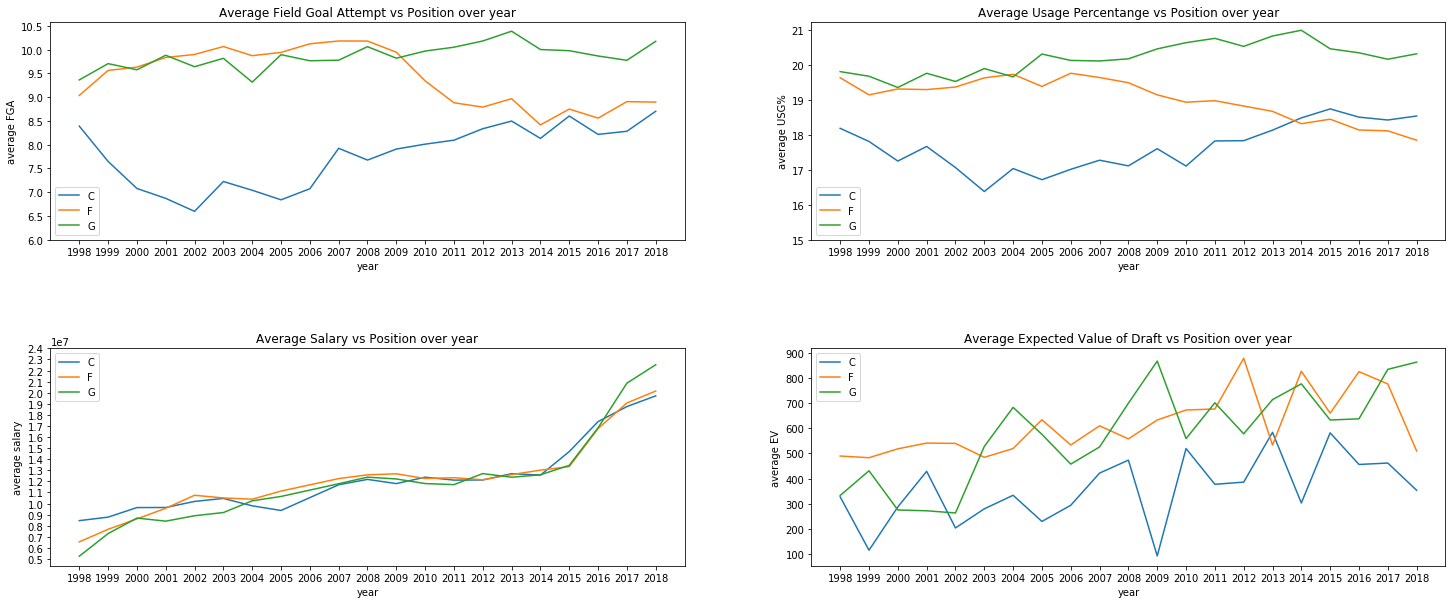

In [14]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 2, figsize = (25, 10))
fig.subplots_adjust(wspace = 0.2, hspace = 0.5)

## Set up legend
positions = ['C', 'F', 'G']

for i in range(3):
    axes[0, 0].plot(position_avgFGA_df.iloc[:,i], label=positions[i])
    axes[0, 1].plot(position_avgUSG_df.iloc[:,i], label=positions[i])
    axes[1, 0].plot(position_avgsalary_df.iloc[:,i], label=positions[i])
    axes[1, 1].plot(position_avgdraft_df.iloc[:,i], label=positions[i])

## Upper left, visualize players' average field goal attempts vs position over year
axes[0, 0].legend()
axes[0, 0].set_title('Average Field Goal Attempt vs Position over year')
axes[0, 0].set_xlabel('year')
axes[0, 0].set_ylabel('average FGA')
x_ticks_1 = np.arange(1998, 2019, 1)
y_ticks_1 = np.arange(6, 11, 0.5)
axes[0, 0].set_xticks(x_ticks_1)
axes[0, 0].set_yticks(y_ticks_1)

## Upper right, visualize players' average usage percentange vs position over year 
axes[0, 1].legend()
axes[0, 1].set_title('Average Usage Percentange vs Position over year')
axes[0, 1].set_xlabel('year')
axes[0, 1].set_ylabel('average USG%')
x_ticks_2 = np.arange(1998, 2019, 1)
y_ticks_2 = np.arange(15, 22, 1)
axes[0, 1].set_xticks(x_ticks_2)
axes[0, 1].set_yticks(y_ticks_2)

## Bottom left, visualize players' average salaries vs position over year 
axes[1, 0].legend()
axes[1, 0].set_title('Average Salary vs Position over year')
axes[1, 0].set_xlabel('year')
axes[1, 0].set_ylabel('average salary')
x_ticks_3 = np.arange(1998, 2019, 1)
y_ticks_3 = np.arange(5000000, 25000000, 1000000)
axes[1, 0].set_xticks(x_ticks_3)
axes[1, 0].set_yticks(y_ticks_3)

## Bottom right, visualize players' expected values of draft vs position over year 
axes[1, 1].legend()
axes[1, 1].set_title('Average Expected Value of Draft vs Position over year')
axes[1, 1].set_xlabel('year')
axes[1, 1].set_ylabel('average EV')
x_ticks_4 = np.arange(1998, 2019, 1)
y_ticks_4 = np.arange(100, 1000, 100)
axes[1, 1].set_xticks(x_ticks_4)
axes[1, 1].set_yticks(y_ticks_4)

## Export figure 
fig.show()
fig.savefig('Visualization')